<a href="https://colab.research.google.com/github/Anakha-s/Data-Science/blob/main/project_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
plt.style.use('fivethirtyeight')
import seaborn as sns



In [ ]:
df = pd.read_csv("covid-19.csv", encoding='utf-8')
df.head()

,source,headlines,description
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2..."
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...


In [ ]:
df.shape

(1034, 3)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       1031 non-null   object
 1   headlines    1031 non-null   object
 2   description  1031 non-null   object
dtypes: object(3)
memory usage: 24.4+ KB


In [ ]:
df.describe()


,source,headlines,description
count,1031,1031,1031
unique,164,940,943
top,Times of India,Coronavirus Updates: Maha Sees 854 New Covid-1...,Trending Topics Â· Top Stories Right Now Â· Fo...
freq,104,3,8


In [ ]:
df.isnull().mean()


source         0.002901
headlines      0.002901
description    0.002901
dtype: float64

In [ ]:
df.columns

Index(['source', 'headlines', 'description'], dtype='object')

In [ ]:
df.dtypes


source         object
headlines      object
description    object
dtype: object

In [ ]:
df['source'].unique()

array(['ABC', 'UPI', 'The Japan Times', 'Devex', 'Firstpost', 'Valneva',
       'Traveller.com.au', 'Fortune', 'The Economic Times', 'UN News',
       'Times of India', 'The New York Times', 'BBC',
       'Carnegie Endowment for International Peace', 'The Hindu',
       'ThePrint', 'The Financial Express', 'Bloomberg.com',
       'Business Wire', 'DVIDS', 'TIME', 'Financial Times', 'Japan Today',
       'UCA News', 'Business Standard', 'USA Today', 'Hindustan Times',
       'Asahi Shimbun', 'Deccan Herald',
       'Regulatory Affairs Professionals Society', 'Nature', 'Reuters',
       'The White House', 'Healthline', 'The Boston Globe',
       'Down To Earth', 'CNN', 'WHO | World Health Organization',
       'Nikkei Asia', 'NBC News', 'CNBC', 'Pharmaceutical Technology',
       'OpIndia', 'The New Yorker', 'News18', 'Forbes India', 'India.com',
       'India Today', 'SDG Knowledge Hub', 'Mint', 'NPR', 'The Economist',
       'Human Rights Watch', 'Medical News Today', 'CBC',
       'Pe

In [ ]:
df['source'].value_counts()

Times of India       104
The Hindu             56
Hindustan Times       54
Schengen Visa         48
Business Standard     41
                    ... 
OpIndia                1
Onmanorama             1
The New Yorker         1
Forbes India           1
DTNext                 1
Name: source, Length: 164, dtype: int64

In [ ]:
df['source'].value_counts().nlargest(30)

Times of India                     104
The Hindu                           56
Hindustan Times                     54
Schengen Visa                       48
Business Standard                   41
The Economic Times                  40
News18                              34
Reuters                             32
The Indian Express                  32
NDTV.com                            29
The Financial Express               28
The Guardian                        27
The Local Italy                     25
France 24                           24
BBC                                 20
Mint                                18
Al Jazeera                          17
India Today                         17
Firstpost                           15
USA Today                           13
Bloomberg.com                       12
India.com                           12
WHO | World Health Organization     12
CNBC                                10
Arab News                           10
CNN                      

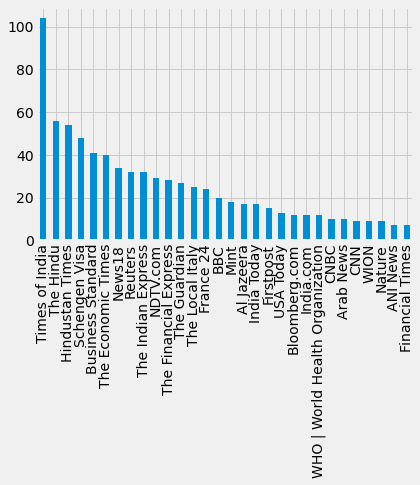

In [ ]:
df['source'].value_counts().nlargest(30).plot(kind='bar')

In [1]:
pip install textcleaner

  Created wheel for textcleaner: filename=textcleaner-0.4.26-py3-none-any.whl size=4737 sha256=d17bc8cd0d205352c10ccb8587bbd8e2f480fda76a656e17ddb7dddde42f335c
  Stored in directory: /root/.cache/pip/wheels/67/e1/1a/8a3dc9c64347e08039c1e69924c9af6ba0a395a0ed92cfb493
Successfully built textcleaner


In [ ]:
>>> import textcleaner as tc
>>> data = tc.document(sample_text)
>>> data.remove_numbers()

In [ ]:
>>> import textcleaner as tc
>>> tc.document(sample_text).lower_all()


In [ ]:
#definition: clear_blank_lines(self,inplace=false)
y = tc.remove_symbols(<file_name>)
#or
y = data.remove_symbols()

calculate sentiment polarity

In [ ]:
polarity=[]
subjectivity=[]
for i in df['headlines'].values:
  try:

    analysis =TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
  except:

    polarity.append(0)
    subjectivity.append(0)  

In [ ]:
df['polarity']=polarity
df['subjectivity']=subjectivity

#dislaying positive news

> Indented block



In [ ]:
df[df.polarity>0].head(20)

,source,headlines,description,polarity,subjectivity
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko...",0.125000,0.166667
5,ABC,COVID live updates: Australia records highest ...,Download the ABC News app and subscribe to our...,0.068182,0.250000
7,Traveller.com.au,New Zealand border opening: Our neighbour has ...,The thinking being that anyone travelling is l...,0.136364,0.454545
8,Fortune,"COVID-19 cases are plummeting in Asia, and sci...","COVID-19 cases are plummeting in Asia, and sci...",0.500000,0.888889
9,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko...",0.125000,0.166667
11,The Economic Times,"Coronavirus News Live Updates: Gurgaon, 4 othe...","India reported 22,775 new cases of Covid-19 an...",0.005682,0.437500
15,BBC,Austria to go into full lockdown as Covid surges,Many other European countries are imposing res...,0.350000,0.550000
19,The Financial Express,Coronavirus (Covid-19) India Highlights: Get C...,"Coronavirus Vaccine Registration, Covid-19 Ind...",0.136364,0.454545
26,Financial Times,Live news from February 7: Tesla subpoenaed by...,Live news from February 7: Tesla subpoenaed by...,0.018182,0.550000
30,Business Standard,New Covid wave batters Afghanistans crumbling ...,"The facility, called the Afghan Japan Communic...",0.136364,0.454545


#displaying negative news

In [ ]:
df[df.polarity<0].head(10)

,source,headlines,description,polarity,subjectivity
28,Financial Times,Live news from January 21: Global stocks notch...,The tech-heavy Nasdaq Composite index fell 7.6...,-0.287879,0.500000
29,UCA News,The India-China game of one-upmanship,New Delhi's boycott of the Beijing Winter Olym...,-0.400000,0.400000
68,OpIndia,CPI(M) congratulates China for administering 2...,The number of Covid-19 vaccine doses administe...,-0.071429,0.214286
76,Hindustan Times,"Indonesia doctors fell sick, many died after t...","Not just Indonesia, other countries like Mongo...",-0.107143,0.678571
117,Pew Research Center,Most Americans Have 'Cold' Views of China. Her...,"â€œVast economic growth in the last 50 years, ...",-0.050000,0.750000
127,Pew Research Center,Most Americans Have 'Cold' Views of China. Her...,"â€œVast economic growth in the last 50 years, ...",-0.050000,0.750000
172,The Financial Express,Coronavirus Omicron Highlights: At least one d...,"COVID-19 | Delhi reports 118 positive cases, o...",-0.150000,0.250000
188,The Hindu,Russia marks another record number of everyday...,Russian President Vladimir Putin has ordered R...,-0.200000,0.600000
210,The Financial Express,Coronavirus Omicron India Live News Updates: 8...,"Covid-19 India Live News, New Omicron Variant ...",-0.054545,0.300000
211,Times of India,Minor face-off at Tawang after Chinese troops ...,The â€œphysical engagementâ€ took place after...,-0.025000,0.100000


#displaying neutral news

In [ ]:
df[df.polarity==0].head(10)

,source,headlines,description,polarity,subjectivity
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ...",0.0,0.0
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...,0.0,0.0
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2...",0.0,0.0
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...,0.0,0.0
6,Valneva,Valneva's Inactivated COVID-19 Vaccine Candida...,All 30 samples (100%) presented neutralizing a...,0.0,0.0
10,The Economic Times,China reportedly takes over Ugandaâ€™s airport...,Ugandan President Yoweri Museveni had sent a d...,0.0,0.0
12,UN News,China headed towards carbon neutrality by 2060...,China is set to provide more COVID-19 vaccines...,0.0,0.0
13,Times of India,"Now, you can translate YouTube comments in ove...",Spotlight Â· Coronavirus outbreak Â· Trending ...,0.0,0.0
14,The New York Times,Covid News: U.S. to Tighten Testing for Travel...,"Zients, the White House's Covid-19 response co...",0.0,0.0
16,Carnegie Endowment for International Peace,China's Influence in South Asia: Vulnerabiliti...,It also included archival research of news art...,0.0,0.0


In [ ]:

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [ ]:
def getpolarity(text):
  return TextBlob(text).sentiment.polarity


   

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
   

In [ ]:
df[ 'sentiment' ] = df['polarity'].apply(get_sentiment)

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


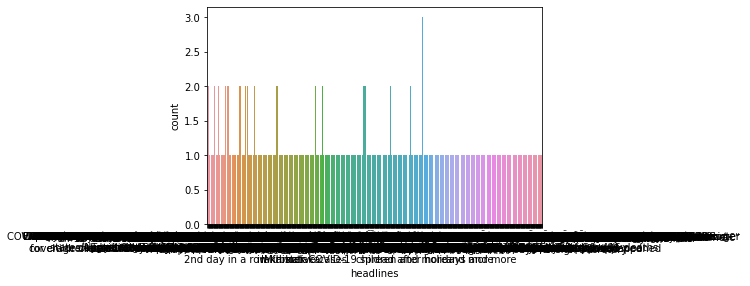

In [ ]:
import seaborn as sns
sns.countplot('headlines',data=df)


In [ ]:
X=df.drop('headlines',axis=1)


In [ ]:
y=df['headlines']


In [ ]:
X.head()

,source,description
0,ABC,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,... remains at 100 seconds to midnight this ye...
3,Devex,"And for earlier news, visit the timeline for 2..."
4,Firstpost,Explained: All you wanted to know ski jumping ...


In [ ]:
y.head()


0    Where Australia's first international tourists...
1    China hasn't reported COVID-19 death in year w...
2    Glimmers of hope, but Doomsday Clock stuck at ...
3    COVID-19 in 2021 â€” a timeline of the coronav...
4    Explained: All you wanted to know ski jumping ...
Name: headlines, dtype: object

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
permanent = df[['source' , 'headlines' , 'description']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()

source         3
headlines      3
description    3
dtype: int64


,source,headlines,description
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2..."
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...


In [ ]:
check =  permanent[permanent["headlines"].isnull()]
check.head()

,source,headlines,description
391,NaN,NaN,NaN
469,NaN,NaN,NaN
853,NaN,NaN,NaN


In [ ]:
senti= permanent[permanent["headlines"].notnull()]
permanent.head()

,source,headlines,description
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2..."
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...


In [ ]:
corpus = []
for i in range(0, 24783):
  review = re.sub('[^a-zA-Z]', ' ', dt_trasformed['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.split()

    sentence = [ps.stem(word) for word in sentence if not word in stopwords.words('english')]

    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence
    corpus.append(sentence)


In [ ]:
corpus

[]

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity
  if sentiment_polarity > 0:
      sentiment_label = 'positive'
  elif sentiment_polarity > 0:
      sentiment_label = 'negative'
  else:
     sentiment_label = 'neutral'
  result = {'polarity':sentiment_polarity,
               'subjectivity':subjectivity,
               'sentiment': sentiment_label}
  return result  


In [ ]:
ex1 = df['cleanup_re'].iloc[0]

KeyError: ignored